In [2]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from os import path
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel, SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.decomposition import IncrementalPCA

# Random Forest

In [3]:
def randomForest(X_train,y_train,X_test,y_test):
    rfv = RandomForestClassifier(n_estimators=30)
    start_time = time.time()
    rfv.fit(X_train, y_train)
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred=rfv.predict(X_test)
    rf_ac=accuracy_score(y_test, y_pred)*100
    rf_recall=recall_score(y_test,y_pred)
    rf_precision=precision_score(y_test,y_pred)
    rf_f1=f1_score(y_test,y_pred)
    print("Random Forest Accuracy is:", rf_ac)
    print("Recall Score is:",rf_recall)
    print("Precision Score is:",rf_precision)
    print("F1 Score is:",rf_f1)
    print("\n")
    return (rf_ac,rf_recall,rf_precision,rf_f1)

# Gaussian Naive Bayes

In [4]:
def gaussianNaiveBayes(X_train,y_train,X_test,y_test):
    gnb = GaussianNB()
    start_time = time.time()
    gnb.fit(X_train, y_train.values.ravel())
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = gnb.predict(X_test)
    gnb_ac = accuracy_score(y_test, y_pred)*100
    gnb_recall=recall_score(y_test,y_pred)
    gnb_precision=precision_score(y_test,y_pred)
    gnb_f1=f1_score(y_test,y_pred)
    print("GaussianNaiveBayes-Classifier Accuracy is ", gnb_ac)
    print("Recall Score is:",gnb_recall)
    print("Precision Score is:",gnb_precision)
    print("F1 Score is:",gnb_f1)
    print("\n")
    return (gnb_ac,gnb_recall,gnb_precision,gnb_f1)

# Decision Tree

In [5]:
def decisionTree(X_train,y_train,X_test,y_test):
    dt = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
    start_time = time.time()
    dt.fit(X_train, y_train.values.ravel())
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = dt.predict(X_test)
    dt_ac = accuracy_score(y_test, y_pred)*100
    dt_recall=recall_score(y_test,y_pred)
    dt_precision=precision_score(y_test,y_pred)
    dt_f1=f1_score(y_test,y_pred)
    print("DecisionTree-Classifier Binary Set-Accuracy is ", dt_ac)
    print("Recall Score is:",dt_recall)
    print("Precision Score is:",dt_precision)
    print("F1 Score is:",dt_f1)
    print("\n")
    return (dt_ac,dt_recall,dt_precision,dt_f1)

# Logistic Regression

In [6]:
def logisticRegression(X_train,y_train,X_test,y_test):
    lr = LogisticRegression(max_iter = 1200000)
    start_time = time.time()
    lr.fit(X_train, y_train.values.ravel())
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = lr.predict(X_test)
    lr_ac = accuracy_score(y_test, y_pred)*100
    lr_recall=recall_score(y_test,y_pred)
    lr_precision=precision_score(y_test,y_pred)
    lr_f1=f1_score(y_test,y_pred)
    print("LogisticRegression-Classifier Accuracy is ", lr_ac)
    print("Recall Score is:",lr_recall)
    print("Precision Score is:",lr_precision)
    print("F1 Score is:",lr_f1)
    print("\n")
    return (lr_ac,lr_recall,lr_precision,lr_f1)

# LSVM

In [7]:
def linearSVM(X_train,y_train,X_test,y_test):
    lsvm = SVC(kernel='linear',gamma='auto')
    start_time = time.time()
    lsvm.fit(X_train, y_train)
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = lsvm.predict(X_test)
    lsvm_ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
    lsvm_recall=recall_score(y_test,y_pred)
    lsvm_precision=precision_score(y_test,y_pred)
    lsvm_f1=f1_score(y_test,y_pred)
    print("LSVM-Classifier Binary Set-Accuracy is ", lsvm_ac)
    print("Recall Score is:",lsvm_recall)
    print("Precision Score is:",lsvm_precision)
    print("F1 Score is:",lsvm_f1)
    print("\n")
    return (lsvm_ac,lsvm_recall,lsvm_precision,lsvm_f1)

# SGD

In [8]:
def stochasticGradientDescent(X_train,y_train,X_test,y_test):
    SGD = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
    start_time = time.time()
    SGD.fit(X_train,y_train)
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = SGD.predict(X_test)
    sgd_ac = accuracy_score(y_test, y_pred)*100
    sgd_recall=recall_score(y_test,y_pred)
    sgd_precision=precision_score(y_test,y_pred)
    sgd_f1=f1_score(y_test,y_pred)
    print("Stochastic-Gradient-Descent-Classifier Set-Accuracy is",sgd_ac)
    print("Recall Score is:",sgd_recall)
    print("Precision Score is:",sgd_precision)
    print("F1 Score is:",sgd_f1)
    print("\n")
    return (sgd_ac,sgd_recall,sgd_precision,sgd_f1)

# Ensemble Hard Voting

In [44]:
def hardVoting():
    estimator = []
    estimator.append(('LR', LogisticRegression(max_iter = 1200000)))
    estimator.append(('SGD',linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")))
    estimator.append(('DT', DecisionTreeClassifier()))
    vote_hard = VotingClassifier(estimators = estimator, voting ='hard')
    start_time = time.time()
    vote_hard.fit(X_train, y_train)
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = vote_hard.predict(X_test)
    hv_ac = accuracy_score(y_test, y_pred)
    hv_recall=recall_score(y_test,y_pred)
    hv_precision=precision_score(y_test,y_pred)
    hv_f1=f1_score(y_test,y_pred)
    print("Hard Voting Accuracy is",hv_ac*100)
    print("Recall Score is:",hv_recall)
    print("Precision Score is:",hv_precision)
    print("F1 Score is:",hv_f1)
    print("\n")
    return (hv_ac*100,hv_recall,hv_precision,hv_f1)

# Training and Testing (Binary Classification)

In [11]:
csv_files = ['1Wednesday-workingHours.csv','2Friday-WorkingHours-Afternoon-DDos.csv']
print(csv_files)
dataset = [pd.read_csv(f) for f in csv_files]
for d in dataset:
    print(d.shape)
dataset = pd.concat([d for d in dataset]).drop_duplicates(keep=False)
dataset.reset_index(drop=True, inplace = True)
dataset.shape
dataset.columns = dataset.columns.str.lstrip()
dataset.drop(['Fwd Header Length.1'],axis=1,inplace=True)
feature_names=list(dataset.columns.values)
print(feature_names)

['1Wednesday-workingHours.csv', '2Friday-WorkingHours-Afternoon-DDos.csv']
(692703, 79)
(225745, 79)
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST

In [12]:
bin_data = pd.read_csv('datasets/bin_data_2017.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
bin_data.shape

(818169, 79)

In [13]:
X = bin_data.iloc[:,0:77].to_numpy() 
Y = bin_data['intrusion'] # target attribute

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# ANOVA

In [16]:
sel_f = SelectKBest(f_classif, k=15)
X_train_f = sel_f.fit(X_train, y_train)
cols = X_train_f.get_support(indices=True)
new_features = [] # The list of your K best features
for bool, feature in zip(cols, feature_names):
    if bool:
        new_features.append(feature)
# X_train_chi2.shape
print(new_features)
X_train_f = sel_f.fit_transform(X_train, y_train)

C:\Program Files\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [31 32 33 49 55 56 57 58 59 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Program Files\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s']


C:\Program Files\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [31 32 33 49 55 56 57 58 59 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Program Files\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [17]:
X_train_f

array([[0.29656938, 0.33316093, 0.26614991, ..., 0.82833333, 0.82833333,
        0.82833333],
       [0.00803891, 0.02706663, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51894521, 0.5       , 0.59451222, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22242704, 0.33316093, 0.21414328, ..., 0.7075    , 0.7075    ,
        0.7075    ],
       [0.        , 0.        , 0.        , ..., 0.09916667, 0.09916667,
        0.09916667],
       [0.37071173, 0.33316093, 0.3815512 , ..., 0.83333333, 0.83333333,
        0.83333333]])

In [18]:
X_test_f = sel_f.transform(X_test)

# Incremental PCA

In [19]:
ipca = IncrementalPCA(n_components=15, batch_size=75)
X_train_ipca = ipca.fit(X_train)
X_pc = X_train_ipca.transform(X_train)

n_pcs= X_train_ipca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(X_train_ipca.components_[i]).argmax() for i in range(n_pcs)]



# get the names
most_important_names = [feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)
X_train_ipca=X_pc

['Fwd IAT Total', 'ACK Flag Count', 'ACK Flag Count', 'PSH Flag Count', 'FIN Flag Count', 'SYN Flag Count', 'ACK Flag Count', 'FIN Flag Count', 'URG Flag Count', 'Bwd IAT Max', 'Idle Std', 'Init_Win_bytes_forward', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'min_seg_size_forward']


In [20]:
X_pc

array([[ 1.78798044e+00,  3.86915980e-01,  3.64424967e-01, ...,
        -4.52994067e-02, -6.58589062e-03,  3.56382574e-02],
       [-6.54119221e-01, -3.42315615e-02, -3.74176439e-01, ...,
        -2.49671158e-02,  2.51202787e-02, -6.68669502e-02],
       [-2.40158023e-01, -1.14944303e+00,  1.02789455e+00, ...,
         8.73564337e-02,  3.73574887e-02, -1.91606801e-02],
       ...,
       [ 1.49561332e+00,  3.87428832e-01,  3.77450834e-01, ...,
        -7.15736157e-02, -3.28397834e-02,  2.70486913e-02],
       [-2.72424071e-01,  6.39217426e-01,  2.37166996e-02, ...,
        -9.83100046e-02, -1.83373032e-02, -2.47162086e-02],
       [ 2.14118022e+00, -5.93975666e-01, -7.76606534e-01, ...,
         7.40434744e-04,  8.96167124e-02,  4.99417515e-02]])

In [21]:
X_test_ipca = ipca.fit_transform(X_test)

# Chi2

In [22]:
sel_chi2 = SelectKBest(chi2, k=15)
X_train_chi2 = sel_chi2.fit(X_train, y_train)
cols = X_train_chi2.get_support(indices=True)
new_features = [] # The list of your K best features
for bool, feature in zip(cols, feature_names):
    if bool:
        new_features.append(feature)
# X_train_chi2.shape
print(new_features)
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)


['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s']


In [23]:
X_train_chi2

array([[8.37813549e-01, 2.96569380e-01, 3.33160934e-01, ...,
        8.28333333e-01, 8.28333333e-01, 8.28333333e-01],
       [5.06400004e-04, 8.03891449e-03, 2.70666322e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.15858338e-04, 5.18945212e-01, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.08510606e-01, 2.22427035e-01, 3.33160934e-01, ...,
        7.07500000e-01, 7.07500000e-01, 7.07500000e-01],
       [9.91581425e-02, 0.00000000e+00, 0.00000000e+00, ...,
        9.91666667e-02, 9.91666667e-02, 9.91666667e-02],
       [8.38704715e-01, 3.70711726e-01, 3.33160934e-01, ...,
        8.33333333e-01, 8.33333333e-01, 8.33333333e-01]])

In [24]:
X_test_chi2 = sel_chi2.transform(X_test)

In [26]:
X_train_rf

array([[1.22077764e-03, 2.20302328e-05, 1.16841257e-02, ...,
        2.20302328e-05, 1.84914543e-05, 3.60107422e-03],
       [8.08765183e-04, 7.34341094e-06, 2.09508461e-03, ...,
        7.34341094e-06, 5.00760383e-07, 0.00000000e+00],
       [1.22077764e-03, 1.46868219e-05, 8.05801773e-04, ...,
        1.46868219e-05, 1.85010229e-05, 3.50952148e-03],
       ...,
       [1.22077764e-03, 2.20302328e-05, 1.41821112e-02, ...,
        2.20302328e-05, 1.84914543e-05, 3.60107422e-03],
       [1.22077764e-03, 0.00000000e+00, 2.41740532e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22077764e-03, 2.20302328e-05, 1.39806608e-02, ...,
        2.20302328e-05, 1.84914543e-05, 3.60107422e-03]])

In [27]:
X_test_rf = sel_rf.fit_transform(X_test, y_test)

# Testing before Feature Selection

In [45]:
rf_ac,rf_recall,rf_precision,rf_f1 = randomForest(X_train,y_train,X_test,y_test)
gnb_ac,gnb_recall,gnb_precision,gnb_f1 = gaussianNaiveBayes(X_train,y_train,X_test,y_test)
dt_ac,dt_recall,dt_precision,dt_f1 = decisionTree(X_train,y_train,X_test,y_test)
lr_ac,lr_recall,lr_precision,lr_f1 = logisticRegression(X_train,y_train,X_test,y_test)
sgd_ac,sgd_recall,sgd_precision,sgd_f1 = stochasticGradientDescent(X_train,y_train,X_test,y_test)
hv_ac,hv_recall,hv_precision,hv_f1=hardVoting()

Time:  69.4423041343689
Random Forest Accuracy is: 99.95885125748113
Recall Score is: 0.9998521594796014
Precision Score is: 0.999469321403141
F1 Score is: 0.9996607037876879


Time:  1.0416955947875977
GaussianNaiveBayes-Classifier Accuracy is  66.23603081674143
Recall Score is: 0.44824573782499716
Precision Score is: 0.9886173318907382
F1 Score is: 0.616820787867579


Time:  10.184926271438599
DecisionTree-Classifier Binary Set-Accuracy is  98.73824103385196
Recall Score is: 0.9864994724781431
Precision Score is: 0.9926430812506762
F1 Score is: 0.9895617414399203


Time:  34.1300630569458
LogisticRegression-Classifier Accuracy is  97.54207560775879
Recall Score is: 0.9685771693916363
Precision Score is: 0.9906728984809953
F1 Score is: 0.9795004400286784


Time:  2.405135154724121
Stochastic-Gradient-Descent-Classifier Set-Accuracy is 96.71380438458185
Recall Score is: 0.9580804924433334
Precision Score is: 0.987340632552857
F1 Score is: 0.9724905186761617


Time:  69.9096667766571
Ha

# Testing after ANOVA

In [30]:
rf_ac_f,rf_recall_f,rf_precision_f,rf_f1_f = randomForest(X_train_f,y_train,X_test_f,y_test)
gnb_ac_f,gnb_recall_f,gnb_precision_f,gnb_f1_f = gaussianNaiveBayes(X_train_f,y_train,X_test_f,y_test)
dt_ac_f,dt_recall_f,dt_precision_f,dt_f1_f = decisionTree(X_train_f,y_train,X_test_f,y_test)
lr_ac_f,lr_recall_f,lr_precision_f,lr_f1_f = logisticRegression(X_train_f,y_train,X_test_f,y_test)
sgd_ac_f,sgd_recall_f,sgd_precision_f,sgd_f1_f = stochasticGradientDescent(X_train_f,y_train,X_test_f,y_test)

Time:  37.9122588634491
Random Forest Accuracy is: 99.32939772093005
Recall Score is: 0.9989583963335551
Precision Score is: 0.990069599387259
F1 Score is: 0.9944941362216261


Time:  0.25535035133361816
GaussianNaiveBayes-Classifier Accuracy is  85.30175065491686
Recall Score is: 0.9071830332842772
Precision Score is: 0.8584209790031921
F1 Score is: 0.8821286564228561


Time:  2.219309091567993
DecisionTree-Classifier Binary Set-Accuracy is  97.12569922306285
Recall Score is: 0.9965660679125591
Precision Score is: 0.9577375647434159
F1 Score is: 0.9767660900178164


Time:  14.313836097717285
LogisticRegression-Classifier Accuracy is  90.27504471360882
Recall Score is: 0.9883071588411991
Precision Score is: 0.86920726481835
F1 Score is: 0.9249389952454027


Time:  1.1519501209259033
Stochastic-Gradient-Descent-Classifier Set-Accuracy is 90.06563428138406
Recall Score is: 0.9946441411473769
Precision Score is: 0.8625458190315795
F1 Score is: 0.9238970312851116




In [31]:
#linearSVM(X_train_f,y_train,X_test_f,y_test)

# Testing after IPCA

In [32]:
rf_ac_ipca,rf_recall_ipca,rf_precision_ipca,rf_f1_ipca = randomForest(X_train_ipca,y_train,X_test_ipca,y_test)
gnb_ac_ipca,gnb_recall_ipca,gnb_precision_ipca,gnb_f1_ipca = gaussianNaiveBayes(X_train_ipca,y_train,X_test_ipca,y_test)
dt_ac_ipca,dt_recall_ipca,dt_precision_ipca,dt_f1_ipca = decisionTree(X_train_ipca,y_train,X_test_ipca,y_test)
lr_ac_ipca,lr_recall_ipca,lr_precision_ipca,lr_f1_ipca = logisticRegression(X_train_ipca,y_train,X_test_ipca,y_test)
sgd_ac_ipca,sgd_recall_ipca,sgd_precision_ipca,sgd_f1_ipca = stochasticGradientDescent(X_train_ipca,y_train,X_test_ipca,y_test)

Time:  79.90297508239746
Random Forest Accuracy is: 93.4202753299029
Recall Score is: 0.9998588795032558
Precision Score is: 0.9021992881267547
F1 Score is: 0.9485219586518171


Time:  0.25032544136047363
GaussianNaiveBayes-Classifier Accuracy is  69.91619508578086
Recall Score is: 0.5469091251201205
Precision Score is: 0.9269151044395344
F1 Score is: 0.6879223704730549


Time:  6.858164072036743
DecisionTree-Classifier Binary Set-Accuracy is  93.80324382463301
Recall Score is: 0.9539140777775538
Precision Score is: 0.9444322468613401
F1 Score is: 0.9491494824681056


Time:  7.30014181137085
LogisticRegression-Classifier Accuracy is  94.4135489364476
Recall Score is: 0.932947603975566
Precision Score is: 0.973808438256234
F1 Score is: 0.9529402074309994


Time:  1.0859007835388184
Stochastic-Gradient-Descent-Classifier Set-Accuracy is 94.11369275333978
Recall Score is: 0.9288685496172947
Precision Score is: 0.9728124318199413
F1 Score is: 0.9503327649744239




In [33]:
#linearSVM(X_train_ipca,y_train,X_test_ipca,y_test)

# Testing after Chi2

In [34]:
rf_ac_chi2,rf_recall_chi2,rf_precision_chi2,rf_f1_chi2 = randomForest(X_train_chi2,y_train,X_test_chi2,y_test)
gnb_ac_chi2,gnb_recall_chi2,gnb_precision_chi2,gnb_f1_chi2 = gaussianNaiveBayes(X_train_chi2,y_train,X_test_chi2,y_test)
dt_ac_chi2,dt_recall_chi2,dt_precision_chi2,dt_f1_chi2 = decisionTree(X_train_chi2,y_train,X_test_chi2,y_test)
lr_ac_chi2,lr_recall_chi2,lr_precision_chi2,lr_f1_chi2 = logisticRegression(X_train_chi2,y_train,X_test_chi2,y_test)
sgd_ac_chi2,sgd_recall_chi2,sgd_precision_chi2,sgd_f1_chi2 = stochasticGradientDescent(X_train_chi2,y_train,X_test_chi2,y_test)

Time:  37.2285270690918
Random Forest Accuracy is: 99.44225120288775
Recall Score is: 0.9990995168302993
Precision Score is: 0.9917617237008872
F1 Score is: 0.9954170976737337


Time:  0.2413318157196045
GaussianNaiveBayes-Classifier Accuracy is  85.06463611881802
Recall Score is: 0.9030703788077334
Precision Score is: 0.8580321797982378
F1 Score is: 0.8799753788932944


Time:  2.36051869392395
DecisionTree-Classifier Binary Set-Accuracy is  97.14281058133803
Recall Score is: 0.9968684689770108
Precision Score is: 0.9577312931758022
F1 Score is: 0.9769080569906388


Time:  12.56385350227356
LogisticRegression-Classifier Accuracy is  89.4251805859418
Recall Score is: 0.9763858368781458
Precision Score is: 0.8662072172508153
F1 Score is: 0.9180024388240571


Time:  1.184828758239746
Stochastic-Gradient-Descent-Classifier Set-Accuracy is 90.0183743394812
Recall Score is: 0.9918553313307663
Precision Score is: 0.8637212160224712
F1 Score is: 0.9233642170325373




# Graphs

In [46]:
algos = ["RF","GNB","DT","LR","SGD","HV"]
ac_scores=[rf_ac,gnb_ac,dt_ac,lr_ac,sgd_ac,hv_ac]
algos2 = ["RF","GNB","DT","LR","SGD"]
ac_scores_f=[rf_ac_f,gnb_ac_f,dt_ac_f,lr_ac_f,sgd_ac_f]
ac_scores_ipca=[rf_ac_ipca,gnb_ac_ipca,dt_ac_ipca,lr_ac_ipca,sgd_ac_ipca]
ac_scores_chi2=[rf_ac_chi2,gnb_ac_chi2,dt_ac_chi2,lr_ac_chi2,sgd_ac_chi2]

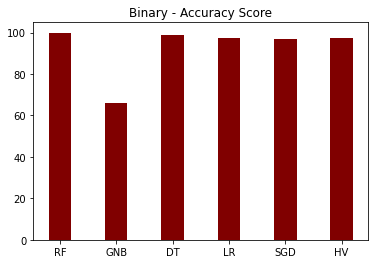

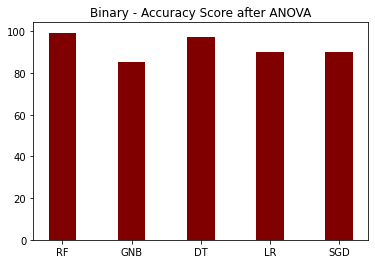

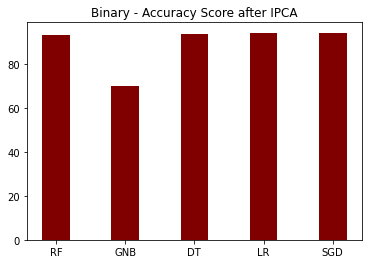

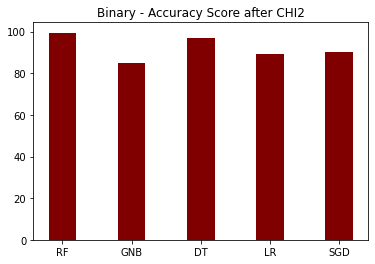

In [47]:
plt.bar(algos, ac_scores, color ='maroon',width = 0.4)
plt.title("Binary - Accuracy Score")
plt.show()
plt.bar(algos2, ac_scores_f, color ='maroon',width = 0.4)
plt.title("Binary - Accuracy Score after ANOVA")
plt.show()
plt.bar(algos2, ac_scores_ipca, color ='maroon',width = 0.4)
plt.title("Binary - Accuracy Score after IPCA")
plt.show()
plt.bar(algos2, ac_scores_chi2, color ='maroon',width = 0.4)
plt.title("Binary - Accuracy Score after CHI2")
plt.show()

# Random Forest Multiclass

In [68]:
def randomForest(X_train,y_train,X_test,y_test):
    rfv = RandomForestClassifier(n_estimators=30)
    start_time = time.time()
    rfv.fit(X_train, y_train)
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred=rfv.predict(X_test)
    rf_ac=accuracy_score(y_test, y_pred)*100
    rf_recall=recall_score(y_test,y_pred,average='macro')
    rf_precision=precision_score(y_test,y_pred,average='macro')
    rf_f1=f1_score(y_test,y_pred,average='macro')
    print("Random Forest Accuracy is:", rf_ac)
    print("Recall Score is:",rf_recall)
    print("Precision Score is:",rf_precision)
    print("F1 Score is:",rf_f1)
    print("\n")
    return (rf_ac,rf_recall,rf_precision,rf_f1)

# Gaussian Naive Bayes

In [69]:
def gaussianNaiveBayes(X_train,y_train,X_test,y_test):
    gnb = GaussianNB()
    start_time = time.time()
    gnb.fit(X_train, y_train.values.ravel())
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = gnb.predict(X_test)
    gnb_ac = accuracy_score(y_test, y_pred)*100
    gnb_recall=recall_score(y_test,y_pred,average='macro')
    gnb_precision=precision_score(y_test,y_pred,average='macro')
    gnb_f1=f1_score(y_test,y_pred,average='macro')
    print("GaussianNaiveBayes-Classifier Accuracy is ", gnb_ac)
    print("Recall Score is:",gnb_recall)
    print("Precision Score is:",gnb_precision)
    print("F1 Score is:",gnb_f1)
    print("\n")
    return (gnb_ac,gnb_recall,gnb_precision,gnb_f1)

# Decision Tree

In [70]:
def decisionTree(X_train,y_train,X_test,y_test):
    dt = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
    start_time = time.time()
    dt.fit(X_train, y_train.values.ravel())
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = dt.predict(X_test)
    dt_ac = accuracy_score(y_test, y_pred)*100
    dt_recall=recall_score(y_test,y_pred,average='macro')
    dt_precision=precision_score(y_test,y_pred,average='macro')
    dt_f1=f1_score(y_test,y_pred,average='macro')
    print("DecisionTree-Classifier Binary Set-Accuracy is ", dt_ac)
    print("Recall Score is:",dt_recall)
    print("Precision Score is:",dt_precision)
    print("F1 Score is:",dt_f1)
    print("\n")
    return (dt_ac,dt_recall,dt_precision,dt_f1)

# Logistic Regression

In [71]:
def logisticRegression(X_train,y_train,X_test,y_test):
    lr = LogisticRegression(max_iter = 1200000,multi_class='multinomial',solver='lbfgs')
    start_time = time.time()
    lr.fit(X_train, y_train.values.ravel())
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = lr.predict(X_test)
    lr_ac = accuracy_score(y_test, y_pred)*100
    lr_recall=recall_score(y_test,y_pred,average='macro')
    lr_precision=precision_score(y_test,y_pred,average='macro')
    lr_f1=f1_score(y_test,y_pred,average='macro')
    print("LogisticRegression-Classifier Accuracy is ", lr_ac)
    print("Recall Score is:",lr_recall)
    print("Precision Score is:",lr_precision)
    print("F1 Score is:",lr_f1)
    print("\n")
    return (lr_ac,lr_recall,lr_precision,lr_f1)

# Schostic Descent Guardian

In [72]:
def stochasticGradientDescent(X_train,y_train,X_test,y_test):
    SGD = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
    start_time = time.time()
    SGD.fit(X_train,y_train)
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = SGD.predict(X_test)
    sgd_ac = accuracy_score(y_test, y_pred)*100
    sgd_recall=recall_score(y_test,y_pred,average='macro')
    sgd_precision=precision_score(y_test,y_pred,average='macro')
    sgd_f1=f1_score(y_test,y_pred,average='macro')
    print("Stochastic-Gradient-Descent-Classifier Set-Accuracy is",sgd_ac)
    print("Recall Score is:",sgd_recall)
    print("Precision Score is:",sgd_precision)
    print("F1 Score is:",sgd_f1)
    print("\n")
    return (sgd_ac,sgd_recall,sgd_precision,sgd_f1)

# Ensemble Hard Voting

In [93]:
def hardVoting():
    print("Hard Voting Multi")
    estimator = []
    estimator.append(('LR', LogisticRegression(max_iter = 1200000,multi_class='multinomial',solver='lbfgs')))
    estimator.append(('SGD',linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")))
    estimator.append(('DT', DecisionTreeClassifier()))
    vote_hard = VotingClassifier(estimators = estimator, voting ='hard')
    start_time = time.time()
    vote_hard.fit(X_train, y_train)
    end_time = time.time()
    print("Time: ", end_time-start_time)
    y_pred = vote_hard.predict(X_test)
    hv_ac = accuracy_score(y_test, y_pred)
    hv_recall=recall_score(y_test,y_pred)
    hv_precision=precision_score(y_test,y_pred)
    hv_f1=f1_score(y_test,y_pred)
    print("Hard Voting Accuracy is",hv_ac*100)
    print("Recall Score is:",hv_recall)
    print("Precision Score is:",hv_precision)
    print("F1 Score is:",hv_f1)
    print("\n")
    return (hv_ac,hv_recall,hv_precision,hv_f1)

# Training and Testing (Multi-class Classification)

In [74]:
multi_data = pd.read_csv('datasets/multi_data_2017.csv')
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
multi_data.shape

(818169, 79)

In [75]:
X = multi_data.iloc[:,0:77].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data['intrusion'] # target attribute

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [77]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# ANOVA

In [78]:
sel_f = SelectKBest(f_classif, k=15)
X_train_f = sel_f.fit(X_train, y_train)
cols = X_train_f.get_support(indices=True)
new_features = [] # The list of your K best features
for bool, feature in zip(cols, feature_names):
    if bool:
        new_features.append(feature)
# X_train_chi2.shape
print(new_features)
X_train_f = sel_f.fit_transform(X_train, y_train)

C:\Program Files\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [31 32 33 49 55 56 57 58 59 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Program Files\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s']


C:\Program Files\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [31 32 33 49 55 56 57 58 59 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Program Files\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# IPCA

In [79]:
ipca = IncrementalPCA(n_components=15, batch_size=75)
X_train_ipca = ipca.fit(X_train)
X_pc = X_train_ipca.transform(X_train)

n_pcs= X_train_ipca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(X_train_ipca.components_[i]).argmax() for i in range(n_pcs)]



# get the names
most_important_names = [feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)
X_train_ipca=X_pc

['Fwd IAT Total', 'ACK Flag Count', 'ACK Flag Count', 'PSH Flag Count', 'FIN Flag Count', 'SYN Flag Count', 'ACK Flag Count', 'FIN Flag Count', 'URG Flag Count', 'Bwd IAT Max', 'Idle Std', 'Init_Win_bytes_forward', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'min_seg_size_forward']


# Chi2

In [80]:
sel_chi2 = SelectKBest(chi2, k=15)
X_train_chi2 = sel_chi2.fit(X_train, y_train)
cols = X_train_chi2.get_support(indices=True)
new_features = [] # The list of your K best features
for bool, feature in zip(cols, feature_names):
    if bool:
        new_features.append(feature)
# X_train_chi2.shape
print(new_features)
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s']


# Testing before Feature Selection

In [81]:
rf_ac,rf_recall,rf_precision,rf_f1 = randomForest(X_train,y_train,X_test,y_test)
gnb_ac,gnb_recall,gnb_precision,gnb_f1 = gaussianNaiveBayes(X_train,y_train,X_test,y_test)
dt_ac,dt_recall,dt_precision,dt_f1 = decisionTree(X_train,y_train,X_test,y_test)
lr_ac,lr_recall,lr_precision,lr_f1 = logisticRegression(X_train,y_train,X_test,y_test)
sgd_ac,sgd_recall,sgd_precision,sgd_f1 = stochasticGradientDescent(X_train,y_train,X_test,y_test)

Time:  91.48015880584717
Random Forest Accuracy is: 99.94377696566728
Recall Score is: 0.9975179410721989
Precision Score is: 0.9979567532428527
F1 Score is: 0.9977366506713985


Time:  1.2595925331115723
GaussianNaiveBayes-Classifier Accuracy is  90.59975310754488
Recall Score is: 0.9149517603213152
Precision Score is: 0.6593328544172652
F1 Score is: 0.7094437443082579


Time:  14.567492961883545


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTree-Classifier Binary Set-Accuracy is  96.13283302981043
Recall Score is: 0.5542160798703698
Precision Score is: 0.6483535328615735
F1 Score is: 0.5903288781073897


Time:  289.63760566711426


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression-Classifier Accuracy is  97.72867089561664
Recall Score is: 0.7858301319194106
Precision Score is: 0.8102398784759856
F1 Score is: 0.7971907541572164


Time:  19.979620933532715
Stochastic-Gradient-Descent-Classifier Set-Accuracy is 95.98046045850292
Recall Score is: 0.6969241403014849
Precision Score is: 0.7926222881943821
F1 Score is: 0.7349894368859156




C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# linearSVM(X_train,y_train,X_test,y_test)

# Testing after ANOVA

In [83]:
rf_ac_f,rf_recall_f,rf_precision_f,rf_f1_f = randomForest(X_train_f,y_train,X_test_f,y_test)
gnb_ac_f,gnb_recall_f,gnb_precision_f,gnb_f1_f = gaussianNaiveBayes(X_train_f,y_train,X_test_f,y_test)
dt_ac_f,dt_recall_f,dt_precision_f,dt_f1_f = decisionTree(X_train_f,y_train,X_test_f,y_test)
lr_ac_f,lr_recall_f,lr_precision_f,lr_f1_f = logisticRegression(X_train_f,y_train,X_test_f,y_test)
sgd_ac_f,sgd_recall_f,sgd_precision_f,sgd_f1_f = stochasticGradientDescent(X_train_f,y_train,X_test_f,y_test)

Time:  49.97824001312256
Random Forest Accuracy is: 90.24408130339661
Recall Score is: 0.5777918390409121
Precision Score is: 0.8239121536486724
F1 Score is: 0.643831021979247


Time:  0.34908437728881836


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNaiveBayes-Classifier Accuracy is  61.821300381746255
Recall Score is: 0.35745767161248004
Precision Score is: 0.36419857084606005
F1 Score is: 0.3200150109567213


Time:  3.60038161277771


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTree-Classifier Binary Set-Accuracy is  93.74661337700803
Recall Score is: 0.48143103550246996
Precision Score is: 0.55280643158528
F1 Score is: 0.48996212052426985


Time:  265.0270297527313


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression-Classifier Accuracy is  68.19405909937217
Recall Score is: 0.22282835886910496
Precision Score is: 0.24492044036220356
F1 Score is: 0.22311365614816128


Time:  8.769418239593506
Stochastic-Gradient-Descent-Classifier Set-Accuracy is 76.45721549311267
Recall Score is: 0.2682365339647558
Precision Score is: 0.3247598076486769
F1 Score is: 0.2613856019693363




C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
#linearSVM(X_train_f,y_train,X_test_f,y_test)

# Testing after IPCA

In [85]:
rf_ac_ipca,rf_recall_ipca,rf_precision_ipca,rf_f1_ipca = randomForest(X_train_ipca,y_train,X_test_ipca,y_test)
gnb_ac_ipca,gnb_recall_ipca,gnb_precision_ipca,gnb_f1_ipca = gaussianNaiveBayes(X_train_ipca,y_train,X_test_ipca,y_test)
dt_ac_ipca,dt_recall_ipca,dt_precision_ipca,dt_f1_ipca = decisionTree(X_train_ipca,y_train,X_test_ipca,y_test)
lr_ac_ipca,lr_recall_ipca,lr_precision_ipca,lr_f1_ipca = logisticRegression(X_train_ipca,y_train,X_test_ipca,y_test)
sgd_ac_ipca,sgd_recall_ipca,sgd_precision_ipca,sgd_f1_ipca = stochasticGradientDescent(X_train_ipca,y_train,X_test_ipca,y_test)

Time:  111.11766481399536
Random Forest Accuracy is: 93.23653193509091
Recall Score is: 0.6702847489348783
Precision Score is: 0.9138792001533869
F1 Score is: 0.7403678011006783


Time:  0.3511383533477783
GaussianNaiveBayes-Classifier Accuracy is  86.99740477732827
Recall Score is: 0.7882094933415964
Precision Score is: 0.6217089247953391
F1 Score is: 0.6560129614014228


Time:  13.59778642654419


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTree-Classifier Binary Set-Accuracy is  88.34023898863724
Recall Score is: 0.39421174050628177
Precision Score is: 0.3674158239531139
F1 Score is: 0.378028146154265


Time:  214.2589454650879


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression-Classifier Accuracy is  91.44472827570472
Recall Score is: 0.5211615499852301
Precision Score is: 0.5191200448941005
F1 Score is: 0.5050381927795315


Time:  8.302340745925903
Stochastic-Gradient-Descent-Classifier Set-Accuracy is 91.24020680298716
Recall Score is: 0.4583286376903037
Precision Score is: 0.4832006427688983
F1 Score is: 0.4577145799972229




C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
#linearSVM(X_train_ipca,y_train,X_test_ipca,y_test)

# Testing after Chi2

In [87]:
rf_ac_chi2,rf_recall_chi2,rf_precision_chi2,rf_f1_chi2 = randomForest(X_train_chi2,y_train,X_test_chi2,y_test)
gnb_ac_chi2,gnb_recall_chi2,gnb_precision_chi2,gnb_f1_chi2 = gaussianNaiveBayes(X_train_chi2,y_train,X_test_chi2,y_test)
dt_ac_chi2,dt_recall_chi2,dt_precision_chi2,dt_f1_chi2 = decisionTree(X_train_chi2,y_train,X_test_chi2,y_test)
lr_ac_chi2,lr_recall_chi2,lr_precision_chi2,lr_f1_chi2 = logisticRegression(X_train_chi2,y_train,X_test_chi2,y_test)
sgd_ac_chi2,sgd_recall_chi2,sgd_precision_chi2,sgd_f1_chi2 = stochasticGradientDescent(X_train_chi2,y_train,X_test_chi2,y_test)

Time:  50.10463905334473
Random Forest Accuracy is: 92.07988559834753
Recall Score is: 0.5908192622173586
Precision Score is: 0.9744171530863851
F1 Score is: 0.6821575272288084


Time:  0.3211784362792969


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNaiveBayes-Classifier Accuracy is  68.69965899507437
Recall Score is: 0.29133214298865456
Precision Score is: 0.20537198191125314
F1 Score is: 0.2241734131342711


Time:  4.02461051940918


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTree-Classifier Binary Set-Accuracy is  90.75008861239107
Recall Score is: 0.4233225140769511
Precision Score is: 0.4047908015740127
F1 Score is: 0.41124827987111934


Time:  379.8956596851349


C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression-Classifier Accuracy is  61.034585314380465
Recall Score is: 0.24735953395100374
Precision Score is: 0.2261225076472217
F1 Score is: 0.2324430288015437


Time:  10.862370491027832
Stochastic-Gradient-Descent-Classifier Set-Accuracy is 77.1282251854749
Recall Score is: 0.2748691891631935
Precision Score is: 0.27931007714343287
F1 Score is: 0.2545424644209332




C:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#linearSVM(X_train_chi2,y_train,X_test_chi2,y_test)

# Graphs

In [89]:
algos = ["RF","GNB","DT","LR","SGD","HV"]
ac_scores=[rf_ac,gnb_ac,dt_ac,lr_ac,sgd_ac,hv_ac]
algos2 = ["RF","GNB","DT","LR","SGD"]
ac_scores_f=[rf_ac_f,gnb_ac_f,dt_ac_f,lr_ac_f,sgd_ac_f]
ac_scores_ipca=[rf_ac_ipca,gnb_ac_ipca,dt_ac_ipca,lr_ac_ipca,sgd_ac_ipca]
ac_scores_chi2=[rf_ac_chi2,gnb_ac_chi2,dt_ac_chi2,lr_ac_chi2,sgd_ac_chi2]

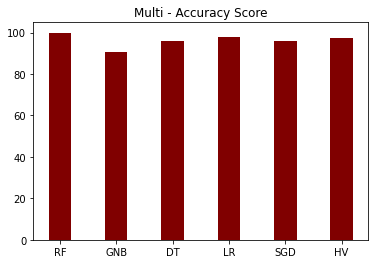

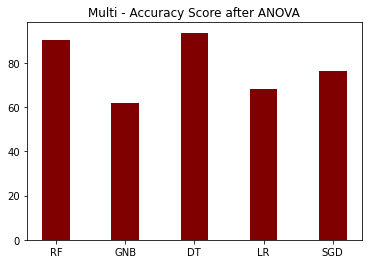

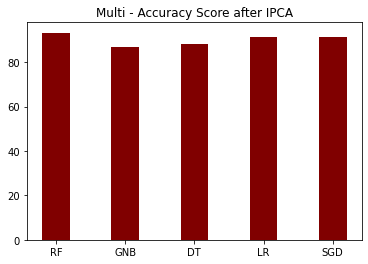

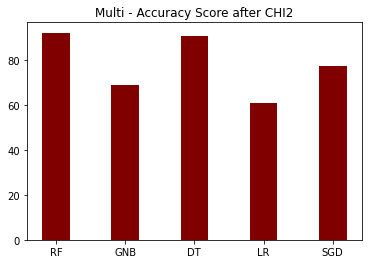

In [91]:
plt.bar(algos, ac_scores, color ='maroon',width = 0.4)
plt.title("Multi - Accuracy Score")
plt.show()
plt.bar(algos2, ac_scores_f, color ='maroon',width = 0.4)
plt.title("Multi - Accuracy Score after ANOVA")
plt.show()
plt.bar(algos2, ac_scores_ipca, color ='maroon',width = 0.4)
plt.title("Multi - Accuracy Score after IPCA")
plt.show()
plt.bar(algos2, ac_scores_chi2, color ='maroon',width = 0.4)
plt.title("Multi - Accuracy Score after CHI2")
plt.show()